In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
fpath = '../data/WT_only.txt'
CV_only = pd.read_csv(fpath,header=None)[0]

In [3]:
def SetFpath(reg):
    pathWT = f'../data/metacycle_outputs/meta2d_{reg}_WT.txt'
    pathKO = f'../data/metacycle_outputs/meta2d_{reg}_KO.txt'
    return pathWT, pathKO

In [4]:
def GetMeta2d(reg):
    pWT,pKO = SetFpath(reg)
    targetcols = ['meta2d_BH.Q','meta2d_phase','meta2d_rAMP']
    WT = pd.read_csv(pWT,sep='\t',index_col='CycID')[targetcols]
    rename = ['WTmeta2d_BH.Q','WTmeta2d_phase','WTmeta2d_rAMP']
    WT.columns = rename
    KO = pd.read_csv(pKO,sep='\t',index_col='CycID')[targetcols]
    rename = ['KOmeta2d_BH.Q','KOmeta2d_phase','KOmeta2d_rAMP']
    KO.columns = rename
    df = WT.join(KO)
    df = df.loc[CV_only]
    print(df.shape)
    df['phasediff'] = (df['WTmeta2d_phase'] - df['KOmeta2d_phase']).abs()
    df['rAMPratio'] = df['WTmeta2d_rAMP'] / df['KOmeta2d_rAMP']
    df['rAMPdiff'] = df['WTmeta2d_rAMP'] - df['KOmeta2d_rAMP']
    df['BHQratio'] = df['KOmeta2d_BH.Q'] / df['WTmeta2d_BH.Q']
    df["phasediff"] = df["phasediff"].apply(lambda x: 24 - x if x > 12 else x) 
    # df = df.drop(columns=['WTmeta2d_phase','KOmeta2d_phase','WTmeta2d_rAMP','KOmeta2d_rAMP','KOmeta2d_BH.Q'])
    return df

In [5]:
df = GetMeta2d('nfil3')
filt = (df['rAMPratio'] > 2) | (df['rAMPdiff'] > 0.2) | (df['phasediff'] > 6)
df[filt]

(4929, 6)


,WTmeta2d_BH.Q,WTmeta2d_phase,WTmeta2d_rAMP,KOmeta2d_BH.Q,KOmeta2d_phase,KOmeta2d_rAMP,phasediff,rAMPratio,rAMPdiff,BHQratio
CycID,,,,,,,,,,
0610007P22Rik,1.000000,24.885218,0.062247,0.431491,7.195712,0.114752,6.310495,0.542443,-0.052506,0.431491
0610009D07Rik,1.000000,21.117152,0.002562,0.203879,6.322991,0.108783,9.205839,0.023554,-0.106221,0.203879
0610039K10Rik,1.000000,18.679943,0.101823,1.000000,25.895424,0.094635,7.215481,1.075951,0.007188,1.000000
1110001J03Rik,1.000000,3.686564,0.089559,1.000000,3.485476,0.033628,0.201088,2.663212,0.055931,1.000000
1110004F10Rik,1.000000,1.104740,0.028901,1.000000,8.282960,0.054843,7.178220,0.526988,-0.025941,1.000000
...,...,...,...,...,...,...,...,...,...,...
Znrf2,0.074044,2.415705,0.112598,1.000000,9.385129,0.042263,6.969424,2.664196,0.070334,13.505502
Zranb1,0.000088,1.292377,0.127704,1.000000,14.414391,0.063097,10.877986,2.023924,0.064607,11377.386859
Zswim3,1.000000,4.179347,0.068492,1.000000,1.064522,0.018445,3.114825,3.713323,0.050047,1.000000


In [6]:
filt2 = (df['WTmeta2d_BH.Q'] < 0.05) & (df['BHQratio']>4)
df[filt2].sort_values('BHQratio',ascending=False).head(20)

,WTmeta2d_BH.Q,WTmeta2d_phase,WTmeta2d_rAMP,KOmeta2d_BH.Q,KOmeta2d_phase,KOmeta2d_rAMP,phasediff,rAMPratio,rAMPdiff,BHQratio
CycID,,,,,,,,,,
Birc5,3.941993e-08,9.491308,0.251834,1.000000,26.143570,0.084115,7.347738,2.993921,0.167719,2.536788e+07
Mcpt2,1.666014e-07,11.844680,0.431561,1.000000,18.480865,0.258489,6.636185,1.669554,0.173072,6.002349e+06
Tirap,7.814170e-07,23.351976,0.209730,1.000000,14.732543,0.020376,8.619433,10.293106,0.189354,1.279726e+06
Snhg12,1.342769e-07,10.804087,0.389920,0.053849,13.503684,0.272032,2.699597,1.433357,0.117887,4.010278e+05
Pyroxd2,2.035051e-06,10.496581,0.266823,0.758087,10.846006,0.169132,0.349425,1.577605,0.097691,3.725152e+05
Csad,2.601553e-06,7.772235,0.211746,0.918116,0.586250,0.097930,7.185984,2.162209,0.113816,3.529108e+05
Herc4,1.610562e-07,21.059528,0.124240,0.044195,16.969854,0.080254,4.089674,1.548081,0.043986,2.744080e+05
Lzts2,4.439389e-06,7.244542,0.127538,1.000000,18.698363,0.009741,11.453820,13.093274,0.117797,2.252562e+05
Zfp236,5.203633e-06,21.592828,0.163640,1.000000,22.121108,0.040444,0.528280,4.046118,0.123197,1.921734e+05


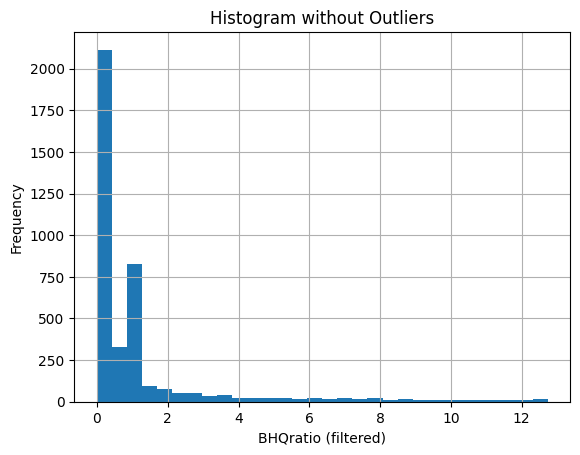

In [7]:
q1 = df['BHQratio'].quantile(0.25)
q3 = df['BHQratio'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

filtered_data = df[(df['BHQratio'] >= lower_bound) & (df['BHQratio'] <= upper_bound)]
filtered_data['BHQratio'].hist(bins=30)
plt.xlabel('BHQratio (filtered)')
plt.ylabel('Frequency')
plt.title('Histogram without Outliers')
plt.show()